## Data Preparation

## Download Dataset

In [1]:
!pip install kaggle

  Using cached kaggle-1.6.17.tar.gz (82 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info
ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software



In [2]:
# !kaggle datasets download asaniczka/tmdb-movies-dataset-2023-930k-movies

In [3]:
path_to_zip_file = "tmdb-movies-dataset-2023-930k-movies.zip"
directory_to_extract_to = "tmdb-movies"

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

## Handle Zero Values

In [1]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("tmdb-movies/TMDB_movie_dataset_v11.csv")

In [2]:
raw_data.sample(5)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
57647,44671,Racing Dreams,7.3,16,Released,2010-05-14,0,93,False,NaN,...,Racing Dreams,"From go-kart champs, NASCAR winners are bred -...",1.429,/9fyPmok5i6gJiLXrM8egM7U3lvu.jpg,Coming of age in a fast world.,Documentary,NaN,United States of America,English,"competition, racing, nascar, sport competition..."
828129,571698,Panni,0.0,0,Released,2005-01-01,0,3,False,NaN,...,Panni,Panni is a visually arresting work in its form...,0.600,/iQo7BAFlp7lS5YIEWXEwSE8W18A.jpg,NaN,NaN,NaN,NaN,NaN,NaN
871261,62096,New Found Glory: The Story So Far,0.0,0,Released,2002-10-15,0,108,False,NaN,...,New Found Glory: The Story So Far,The Story So Far is a documentary about Punk/R...,0.841,/ncAFI9EqZFlwJ7UxlLiVSisTlGm.jpg,NaN,"Documentary, Music",NaN,United States of America,English,NaN
913585,417671,JPEGs,0.0,0,Released,2015-01-01,0,2,False,NaN,...,JPEGs,When you receive series of photos in your emai...,0.600,/424aMGsACjV2HRmq8DDJA1AGVqX.jpg,NaN,NaN,NaN,NaN,NaN,NaN
109355,236268,Porky the Giant Killer,5.7,6,Released,1939-11-17,0,8,False,NaN,...,Porky the Giant Killer,Porky Pig is tapped for a giant-killing expedi...,0.771,/g4bdx74OfEyVoyMWzPkZ7B0qPsW.jpg,NaN,Animation,Leon Schlesinger Productions,United States of America,NaN,NaN


In [3]:
zero_columns = ["vote_average","vote_count","revenue","runtime","budget"]

for column in zero_columns:
    print(f"Zero Values in column {column} : ",len(raw_data[raw_data[column]==0]))

#Turns out the following columns except runtime column has too many zero values
#So some datas will be dropped due to its values

Zero Values in column vote_average :  797031
Zero Values in column vote_count :  796794
Zero Values in column revenue :  1126572
Zero Values in column runtime :  318207
Zero Values in column budget :  1088114


In [4]:
#First the vote columns (average and counts) will be handled

raw_data[["vote_average","vote_count"]].value_counts()

vote_average  vote_count
0.000         0             796253
10.000        1              22980
6.000         1              19561
7.000         1              16259
8.000         1              15142
                             ...  
4.795         22                 1
5.282         1337               1
4.799         689                1
              72                 1
2.912         17                 1
Name: count, Length: 36468, dtype: int64

In [5]:
#First step is that we will drop datas with zero values of both 
#vote average and vote count 

non_zero_vote = raw_data[~((raw_data["vote_average"] == 0) & (raw_data["vote_count"] ==0))]

non_zero_vote.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [6]:
vote_mean = non_zero_vote["vote_average"].mean()
vote_count = non_zero_vote["vote_count"].quantile(0.75)
print(vote_mean)
print(vote_count)

6.090329125959326
8.0


In [7]:
vote_movies = non_zero_vote.copy().loc[non_zero_vote["vote_count"]>=vote_count]

vote_movies.shape

(91266, 24)

In [8]:
def weighted_rating(x, m=vote_count, C=vote_mean):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

# Define a new feature 'score' and calculate its value with `weighted_rating()`
vote_movies['score'] = vote_movies.apply(weighted_rating, axis=1)

vote_movies = vote_movies.sort_values("score",ascending=False)

#Show the result with new column score with relevant columns
vote_movies[["title","vote_average","vote_count","score"]].head(10)

,title,vote_average,vote_count,score
27715,What's New Scooby-Doo? Vol. 3: Halloween Boos ...,9.980,50,9.443494
29290,"What's New, Scooby-Doo? Vol. 7: Ready to Scare",10.000,46,9.420790
29369,What's New Scooby-Doo? Vol. 4: Merry Scary Hol...,10.000,46,9.420790
28429,"What's New, Scooby-Doo? Vol. 1: Space Ape at t...",9.900,48,9.355761
28441,"What's New, Scooby-Doo? Vol. 5: Sports Spookta...",9.900,48,9.355761
31906,The 1st 13th Annual Fancy Anvil Awards Show Pr...,10.000,40,9.348388
29087,"What's New, Scooby-Doo? Vol. 7: Ghosts on the Go!",9.872,47,9.321939
25744,Scooby-Doo! and the Werewolves,9.763,57,9.310979
30634,Scooby-Doo: Mystery in Motion,9.900,43,9.302405
28005,Scooby-Doo! and the Sea Monsters,9.800,49,9.279344


In [9]:
#Second step to review the revenue and budget columns
vote_movies[["revenue","budget"]].value_counts()

revenue     budget   
0           0            71482
            1000000        291
            2000000        261
            3000000        215
            10000000       189
                         ...  
1274219009  150000000        1
1310466296  170000000        1
1332698830  200000000        1
1341511219  125000000        1
95918706    15000000         1
Name: count, Length: 14651, dtype: int64

In [10]:
#Same with vote columns, dropping the data with zero values too 

profit_data = vote_movies[~((vote_movies["revenue"] == 0) | (vote_movies["budget"] ==0))]

profit_data.shape

(9039, 25)

In [11]:
revenue = profit_data["revenue"].values
budget = profit_data["budget"].values
profit =revenue-budget

profit_data["profit"] = profit

profit_data

C:\Users\viola\AppData\Local\Temp\ipykernel_14008\2980321947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_data["profit"] = profit


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,score,profit
53,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,158.448,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,An offer you can't refuse.,"Drama, Crime","Paramount, Alfran Productions",United States of America,"English, Italian, Latin","based on novel or book, loss of loved one, lov...",8.705880,239066411
14,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,122.610,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,Fear can hold you prisoner. Hope can set you f...,"Drama, Crime",Castle Rock Entertainment,United States of America,English,"prison, friendship, police brutality, corrupti...",8.701153,3341469
215,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,64.753,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,"I don't feel I have to wipe everybody out, Tom...","Drama, Crime","Paramount, The Coppola Company",United States of America,"English, Italian, Latin, Spanish","italian american, cuba, italy, gangster, prais...",8.589230,89600000
119,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,65.084,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,"Whoever saves one life, saves the world entire.","Drama, History, War",Amblin Entertainment,United States of America,"German, Polish, Hebrew, English","factory, hero, based on novel or book, nazi, c...",8.571640,299365567
991,19404,Dilwale Dulhania Le Jayenge,8.552,4256,Released,1995-10-20,100000000,190,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,...,33.575,/ktejodbcdCPXbMMdnpI9BUxW6O8.jpg,"Come Fall In love, All Over Again..","Comedy, Drama, Romance",Yash Raj Films,India,Hindi,"family's daily life, family history, love-hate...",8.547381,86800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,76994,Box Office 3D - Il film dei film,2.719,221,Released,2011-09-09,2777000,102,False,/wWRtoKyAJArhz1q5Z7cDFVFiIUn.jpg,...,7.147,/xzvzutgoXNPpTELdoH2DWx19oDz.jpg,NaN,Comedy,Mondo Home Entertainment,Italy,Italian,"parody, hopeless, celebratory",2.836776,-2223000
20710,64526,Alex the Ram,2.346,81,Released,2000-07-21,4775,111,False,/fbSX9D23sl4OKRDOYW4787aSdQT.jpg,...,4.098,/x90nmBGWEPu28bhSngegCzbGZJC.jpg,"Funny, exuberant, charged, he's a 007 who love...","Action, Adventure, Crime",Cecchi Gori Group,Italy,Italian,NaN,2.682569,-3495225
46673,330878,"Kidnapping, Caucasian Style",1.295,22,Released,2014-08-21,179000,95,False,NaN,...,2.706,/s5QSniG6P7mtytKApSQUr3XlEbg.jpg,NaN,"Romance, Comedy, Adventure","WSB, DreamTeam Media",Russia,Russian,NaN,2.573754,-3321000
21291,295884,Saving Christmas,1.840,78,Released,2014-11-14,2800000,79,False,/4WeepGC2ySw8HCn7eBcIvWBvkv2.jpg,...,6.203,/vezdMXYQJmA4OTczOCIagQUwsTP.jpg,Put Christ Back in Christmas,"Comedy, Family","Provident Films, Camfam Studios, Liberty Unive...",United States of America,English,"evangelical christianity, christmas, christian...",2.235379,2300000


In [12]:
#We will only take movies that already released

released_dataset = profit_data[profit_data["status"]=="Released"]

released_dataset.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,score,profit
53,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,158.448,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,An offer you can't refuse.,"Drama, Crime","Paramount, Alfran Productions",United States of America,"English, Italian, Latin","based on novel or book, loss of loved one, lov...",8.705880,239066411
14,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,122.610,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,Fear can hold you prisoner. Hope can set you f...,"Drama, Crime",Castle Rock Entertainment,United States of America,English,"prison, friendship, police brutality, corrupti...",8.701153,3341469
215,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,64.753,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,"I don't feel I have to wipe everybody out, Tom...","Drama, Crime","Paramount, The Coppola Company",United States of America,"English, Italian, Latin, Spanish","italian american, cuba, italy, gangster, prais...",8.589230,89600000
119,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,65.084,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,"Whoever saves one life, saves the world entire.","Drama, History, War",Amblin Entertainment,United States of America,"German, Polish, Hebrew, English","factory, hero, based on novel or book, nazi, c...",8.571640,299365567
991,19404,Dilwale Dulhania Le Jayenge,8.552,4256,Released,1995-10-20,100000000,190,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,...,33.575,/ktejodbcdCPXbMMdnpI9BUxW6O8.jpg,"Come Fall In love, All Over Again..","Comedy, Drama, Romance",Yash Raj Films,India,Hindi,"family's daily life, family history, love-hate...",8.547381,86800000


## Handle Missing Datas

In [13]:
profit_data.isna().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date               4
revenue                    0
runtime                    0
adult                      0
backdrop_path            143
budget                     0
homepage                5948
imdb_id                    8
original_language          0
original_title             0
overview                   9
popularity                 0
poster_path               10
tagline                 1462
genres                     8
production_companies     152
production_countries      74
spoken_languages          16
keywords                 602
score                      0
profit                     0
dtype: int64

In [57]:
profit_data["backdrop_path"]


53       /tmU7GeKVybMWFButWEGl2M4GeiP.jpg
14       /kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg
215      /kGzFbGhp99zva6oZODW5atUtnqi.jpg
119      /zb6fM1CX41D9rF9hdgclu0peUmy.jpg
991      /90ez6ArvpO8bvpyIngBuwXOqJm5.jpg
                       ...               
11011    /wWRtoKyAJArhz1q5Z7cDFVFiIUn.jpg
20710    /fbSX9D23sl4OKRDOYW4787aSdQT.jpg
46673                                   -
21291    /4WeepGC2ySw8HCn7eBcIvWBvkv2.jpg
16302    /t7zb6CnRQwhzQSq0apR4ESFYiWN.jpg
Name: backdrop_path, Length: 9039, dtype: object

In [58]:
profit_data["poster_path"]

53       /3bhkrj58Vtu7enYsRolD1fZdja1.jpg
14       /lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg
215      /hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg
119      /sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg
991      /ktejodbcdCPXbMMdnpI9BUxW6O8.jpg
                       ...               
11011    /xzvzutgoXNPpTELdoH2DWx19oDz.jpg
20710    /x90nmBGWEPu28bhSngegCzbGZJC.jpg
46673    /s5QSniG6P7mtytKApSQUr3XlEbg.jpg
21291    /vezdMXYQJmA4OTczOCIagQUwsTP.jpg
16302    /to9ggXVyhNTCICHcHMCtFtANd8P.jpg
Name: poster_path, Length: 9039, dtype: object

In [14]:
#Fill the backdrop and poster_path missing value to "-" only

profit_data["backdrop_path"] = profit_data["backdrop_path"].fillna("-")
profit_data["poster_path"] = profit_data["poster_path"].fillna("-")
profit_data["keywords"] = profit_data["keywords"].fillna("-")

profit_data.head()

C:\Users\viola\AppData\Local\Temp\ipykernel_14008\2935079991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_data["backdrop_path"] = profit_data["backdrop_path"].fillna("-")
C:\Users\viola\AppData\Local\Temp\ipykernel_14008\2935079991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_data["poster_path"] = profit_data["poster_path"].fillna("-")
C:\Users\viola\AppData\Local\Temp\ipykernel_14008\2935079991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,score,profit
53,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,158.448,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,An offer you can't refuse.,"Drama, Crime","Paramount, Alfran Productions",United States of America,"English, Italian, Latin","based on novel or book, loss of loved one, lov...",8.705880,239066411
14,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,122.610,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,Fear can hold you prisoner. Hope can set you f...,"Drama, Crime",Castle Rock Entertainment,United States of America,English,"prison, friendship, police brutality, corrupti...",8.701153,3341469
215,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,64.753,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,"I don't feel I have to wipe everybody out, Tom...","Drama, Crime","Paramount, The Coppola Company",United States of America,"English, Italian, Latin, Spanish","italian american, cuba, italy, gangster, prais...",8.589230,89600000
119,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,65.084,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,"Whoever saves one life, saves the world entire.","Drama, History, War",Amblin Entertainment,United States of America,"German, Polish, Hebrew, English","factory, hero, based on novel or book, nazi, c...",8.571640,299365567
991,19404,Dilwale Dulhania Le Jayenge,8.552,4256,Released,1995-10-20,100000000,190,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,...,33.575,/ktejodbcdCPXbMMdnpI9BUxW6O8.jpg,"Come Fall In love, All Over Again..","Comedy, Drama, Romance",Yash Raj Films,India,Hindi,"family's daily life, family history, love-hate...",8.547381,86800000


In [15]:
#Filter to columns with missing to be dropped

droped_columns = ["production_companies","production_countries","homepage","tagline","spoken_languages"]
clean_data = profit_data.drop(droped_columns,axis=1)

clean_data.isna().sum()

id                   0
title                0
vote_average         0
vote_count           0
status               0
release_date         4
revenue              0
runtime              0
adult                0
backdrop_path        0
budget               0
imdb_id              8
original_language    0
original_title       0
overview             9
popularity           0
poster_path          0
genres               8
keywords             0
score                0
profit               0
dtype: int64

In [16]:
#The remaining missing data will dropped its data

dropped_data = clean_data[clean_data[["release_date","imdb_id","overview","genres"]].isna().any(axis=1)]

dropped_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,keywords,score,profit
55262,449350,Expendable Assets,9.000,17,Released,1996-01-01,24000,91,False,-,...,tt2403945,en,Expendable Assets,NaN,2.058,/lvjgHQer0N9b13HhK5EAHXTCW2g.jpg,"Fantasy, Adventure, History","minnesota, saint paul, minnesota, minneapolis",8.068905,-90000
20569,126400,Gangs of Wasseypur - Part 2,7.900,82,Released,2012-08-08,4900000,160,False,/68EFQno9UFwCcvdvJBjrWSTOzgw.jpg,...,NaN,hi,गैंग्स ऑफ़ वास्सेपुर पार्ट - २,After the death of his father and brother Dani...,9.978,/4CVPyT10Cvw9BCgWNKXiRcXntuc.jpg,"Action, Crime, Thriller","gun, family relationships, revenge, mafia",7.739140,3230000
87523,802286,Go,8.600,8,Released,NaN,2,1,False,-,...,NaN,en,Go,"When a man is driving, he accidentally hits an...",0.600,-,NaN,-,7.345165,-66
90090,379672,Byomkesh Phire Elo,7.200,8,Released,2014-12-19,280,107,False,-,...,tt4282396,bn,Byomkesh Phire Elo,Byomkesh is called upon for help by police to ...,0.600,/nt4UbOq7mgcOMYFXGOLANIXuQHu.jpg,NaN,-,6.645165,180
61278,734185,Friend,6.821,14,Released,2018-12-21,1,37,False,/1RpvWZyeVbE4zqIOy1mwcZyLLC.jpg,...,NaN,de,Friend,"When their best friend dies, Tara and Noah fin...",0.600,/b5UaPLwsicBkN0z4i0gt05UhMNb.jpg,"Drama, Mystery, Crime",-,6.555302,0
57632,75087,Faites entrer Fabrice Eboué,6.500,16,Released,2010-10-17,10000,0,False,/zXbVU8n7x4G6wSp3iHAnLdwPUug.jpg,...,NaN,fr,Faites entrer Fabrice Eboué,NaN,0.945,/dLgpSOi834oAjZ5WEMoAG0OZ33J.jpg,Comedy,one-man show,6.363443,9990
90916,289179,How the Grinch Stole Christmas! Documentary,6.500,8,Released,1994-01-01,100000,19,False,-,...,NaN,en,How the Grinch Stole Christmas!: Documentary,The making of the story of how a grumpy hermit...,1.444,-,"Animation, Documentary, Family, Fantasy",-,6.295165,70000
84765,20078,UFC 100: Lesnar vs. Mir 2,6.438,8,Released,2009-07-11,5128490,178,False,/sNyPcaboxcsJQlyzR4eXkAvEyzo.jpg,...,tt1509277,en,UFC 100: Lesnar vs. Mir 2,UFC 100 was a mixed martial arts event produce...,2.525,/prGWLQOpJzHaB7hz32T90s7sjLv.jpg,NaN,mixed martial arts,6.264165,3338490
56901,966920,qWedsfdghtrgefg,6.100,16,Released,NaN,1,130,False,-,...,NaN,en,qWedsfdghtrgefg,NaN,0.600,/vmNuPd7G985kOvgtFmTkvXLv6sW.jpg,NaN,-,6.096776,-2
84550,567224,Kölcsönlakás,6.100,8,Released,2019-02-14,757123,95,False,/tdHk0T3mzenJJQmvtKVV9JB8Nsp.jpg,...,tt9015746,hu,Kölcsönlakás,NaN,0.628,/es6FUvcdyVljm7fv53fFnHHqgcm.jpg,"Romance, Comedy",-,6.095165,-888143


In [17]:
clean_data = clean_data.dropna(subset=["release_date","imdb_id","overview","genres"])

clean_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,keywords,score,profit
53,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",158.448,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,"Drama, Crime","based on novel or book, loss of loved one, lov...",8.705880,239066411
14,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,122.610,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,"Drama, Crime","prison, friendship, police brutality, corrupti...",8.701153,3341469
215,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,tt0071562,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,64.753,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,"Drama, Crime","italian american, cuba, italy, gangster, prais...",8.589230,89600000
119,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,65.084,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,"Drama, History, War","factory, hero, based on novel or book, nazi, c...",8.571640,299365567
991,19404,Dilwale Dulhania Le Jayenge,8.552,4256,Released,1995-10-20,100000000,190,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,...,tt0112870,hi,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",33.575,/ktejodbcdCPXbMMdnpI9BUxW6O8.jpg,"Comedy, Drama, Romance","family's daily life, family history, love-hate...",8.547381,86800000


In [18]:
clean_data =clean_data.reset_index(drop=True)

clean_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,keywords,score,profit
0,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,tt0068646,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",158.448,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,"Drama, Crime","based on novel or book, loss of loved one, lov...",8.705880,239066411
1,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,122.610,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,"Drama, Crime","prison, friendship, police brutality, corrupti...",8.701153,3341469
2,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,tt0071562,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,64.753,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,"Drama, Crime","italian american, cuba, italy, gangster, prais...",8.589230,89600000
3,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,65.084,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,"Drama, History, War","factory, hero, based on novel or book, nazi, c...",8.571640,299365567
4,19404,Dilwale Dulhania Le Jayenge,8.552,4256,Released,1995-10-20,100000000,190,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,...,tt0112870,hi,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",33.575,/ktejodbcdCPXbMMdnpI9BUxW6O8.jpg,"Comedy, Drama, Romance","family's daily life, family history, love-hate...",8.547381,86800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9015,76994,Box Office 3D - Il film dei film,2.719,221,Released,2011-09-09,2777000,102,False,/wWRtoKyAJArhz1q5Z7cDFVFiIUn.jpg,...,tt1969959,it,Box Office 3D - Il film dei film,An Italian parody of the biggest U.S. blockbus...,7.147,/xzvzutgoXNPpTELdoH2DWx19oDz.jpg,Comedy,"parody, hopeless, celebratory",2.836776,-2223000
9016,64526,Alex the Ram,2.346,81,Released,2000-07-21,4775,111,False,/fbSX9D23sl4OKRDOYW4787aSdQT.jpg,...,tt0172109,it,Alex l'ariete,Alessandro Corso is a special forces carabinie...,4.098,/x90nmBGWEPu28bhSngegCzbGZJC.jpg,"Action, Adventure, Crime",-,2.682569,-3495225
9017,330878,"Kidnapping, Caucasian Style",1.295,22,Released,2014-08-21,179000,95,False,-,...,tt4537362,ru,Кавказская пленница!,Shura journalist comes to the Caucasus to shoo...,2.706,/s5QSniG6P7mtytKApSQUr3XlEbg.jpg,"Romance, Comedy, Adventure",-,2.573754,-3321000
9018,295884,Saving Christmas,1.840,78,Released,2014-11-14,2800000,79,False,/4WeepGC2ySw8HCn7eBcIvWBvkv2.jpg,...,tt4009460,en,Saving Christmas,Kirk is enjoying the annual Christmas party ex...,6.203,/vezdMXYQJmA4OTczOCIagQUwsTP.jpg,"Comedy, Family","evangelical christianity, christmas, christian...",2.235379,2300000


## Machine Learning Model Preparatin

### Prepare Dependencies and Library

In [19]:
!pip install yellowbrick

In [20]:
!pip install plotly

In [21]:
import matplotlib.pyplot as plt # untuk visualisasi data
import seaborn as sns # untuk visualisasi data yang jauh lebih mudah
import plotly.express as px # untuk visualisasi data interaktif

# untuk melakukan standarisasi pada data numerik
from sklearn.preprocessing import StandardScaler
# untuk pemodelan k-means
from sklearn.cluster import KMeans, DBSCAN

# untuk evaluasi hasil klaster
from sklearn.metrics import silhouette_score, calinski_harabasz_score
# untuk visualisasi silhouette score
from yellowbrick.cluster import SilhouetteVisualizer
# untuk mencari klaster optimal menggunakan elbow method
from yellowbrick.cluster import KElbowVisualizer

### Encoding Categorical Data

#### Release Date Encoding

In [22]:
# Make new category data based on release date

clean_data.sort_values("release_date",ascending=False)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,keywords,score,profit
1622,951491,Saw X,7.321,56,Released,2023-09-26,29300000,118,False,/9b3uxqcjkmay20EBZZj1KVow0r5.jpg,...,tt21807222,en,Saw X,"Between the events of 'Saw' and 'Saw II', a si...",949.967,/aQPeznSu7XDTrrdCtT5eLiu52Yu.jpg,"Crime, Horror, Thriller","mexico city, mexico, sadism, riddle, gore, seq...",7.167166,16300000
1835,893723,PAW Patrol: The Mighty Movie,7.679,14,Released,2023-09-21,47400000,92,False,/fwXeTKmJvlv7kbH8QDmbykGfMeK.jpg,...,tt15837338,en,PAW Patrol: The Mighty Movie,A magical meteor crash-lands in Adventure City...,257.355,/oXnSu4raRAd65QVBQXvdHMC6AuW.jpg,"Animation, Family, Comedy, Action, Science Fic...","superhero, cartoon, mad scientist, sequel, dog...",7.101302,17400000
3630,299054,Expend4bles,6.685,81,Released,2023-09-15,15000000,103,False,/rMvPXy8PUjj1o8o1pzgQbdNCsvj.jpg,...,tt3291150,en,Expend4bles,Armed with every weapon they can get their han...,484.627,/nbrqj9q8WubD3QkYm7n3GhjN7kE.jpg,"Action, Adventure, Thriller","sequel, nuclear bomb, cargo ship, ring",6.631546,-85000000
3338,820525,After Everything,6.768,69,Released,2023-09-13,3280152,93,False,/jkKVLzLWjSvTnc84VzeljhSy6j8.jpg,...,tt15334488,en,After Everything,Besieged by writer’s block and the crushing br...,474.472,/gZLGCibvFY4zmt8sWUZcbBTHRtk.jpg,"Romance, Drama","lisbon, portugal, writer's block, sequel, love...",6.697593,-10719848
3021,945729,A Haunting in Venice,6.786,519,Released,2023-09-13,89800000,104,False,/kHlX3oqdD4VGaLpB8O78M25KfdS.jpg,...,tt22687790,en,A Haunting in Venice,"Celebrated sleuth Hercule Poirot, now retired ...",147.584,/1Xgjl22MkAZQUavvOeBqRehrvqO.jpg,"Mystery, Thriller, Crime","based on novel or book, venice, italy, loss of...",6.775440,29800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219,30266,"20,000 Leagues Under the Sea",6.300,48,Released,1916-12-24,8000000,85,False,/oYzjut2K1duZVwTWc9Kg1MnzAJa.jpg,...,tt0006333,en,"20,000 Leagues Under the Sea",Captain Nemo has built a fantastic submarine f...,3.474,/sv8LaZwJPMNUah2CurnOxmqlbS5.jpg,"Adventure, Drama, Action, Science Fiction","revenge, captain nemo",6.270047,7800000
1884,3059,Intolerance: Love's Struggle Throughout the Ages,7.118,302,Released,1916-09-04,1750000,197,False,/5s5Vau1tCvoQaaTTTGk4Qux8CcH.jpg,...,tt0006864,en,Intolerance: Love's Struggle Throughout the Ages,"The story of a poor young woman, separated by ...",10.040,/lJCabs4TMOsKfnl0BmA5Hf16Ezb.jpg,"Drama, History","naivety, mill, marriage, intolerance, wedding,...",7.091479,1364093
6420,70368,The Cheat,5.983,58,Released,1915-12-13,137365,59,False,/nbVh0QQzPyDvQ9jpnDbPJmNVhwf.jpg,...,tt0005078,en,The Cheat,"A venal, spoiled stockbroker's wife impulsivel...",3.104,/1cnktg7gG1HutqKQ47jgcAWsP9R.jpg,Drama,-,5.996010,120054
6255,618,The Birth of a Nation,6.034,482,Released,1915-02-08,11000000,193,False,/4H4RAeeykpi0ijvu3wYgV346y06.jpg,...,tt0004972,en,The Birth of a Nation,"Two families, abolitionist Northerners the Sto...",13.791,/pNpOXpQI5GSUfiWypubYtMh9928.jpg,"Drama, History, War","army, ku klux klan, southern usa, racist, sile...",6.034920,10900000


In [23]:
#Convert release date column into datetime

date = clean_data["release_date"]
date= pd.to_datetime(date, errors='coerce')


In [24]:
# Let's observe into three categories

filtered_df1 = clean_data[(date >= '2010-01-01')] #2010s movies and newer 
filtered_df2 = clean_data[(date >= '1970-01-01')&(date < '2010-01-01')] #From 1970-2010
filtered_df3 = clean_data[(date < '1970-01-01')] #Older than 1970

print(filtered_df1.shape)
print(filtered_df2.shape)
print(filtered_df3.shape)


(3423, 21)
(4951, 21)
(646, 21)


In [25]:
conditions = [(date >= '2010-01-01'),((date >= '1970-01-01')&(date < '2010-01-01')),(date < '1970-01-01')]
labels = [0,1,2]

clean_data['period_release'] = np.select(conditions, labels, default=-1)

clean_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,genres,keywords,score,profit,period_release
0,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",158.448,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,"Drama, Crime","based on novel or book, loss of loved one, lov...",8.705880,239066411,1
1,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,122.610,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,"Drama, Crime","prison, friendship, police brutality, corrupti...",8.701153,3341469,1
2,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,en,The Godfather Part II,In the continuing saga of the Corleone crime f...,64.753,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,"Drama, Crime","italian american, cuba, italy, gangster, prais...",8.589230,89600000,1
3,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,en,Schindler's List,The true story of how businessman Oskar Schind...,65.084,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,"Drama, History, War","factory, hero, based on novel or book, nazi, c...",8.571640,299365567,1
4,19404,Dilwale Dulhania Le Jayenge,8.552,4256,Released,1995-10-20,100000000,190,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,...,hi,दिलवाले दुल्हनिया ले जायेंगे,"Raj is a rich, carefree, happy-go-lucky second...",33.575,/ktejodbcdCPXbMMdnpI9BUxW6O8.jpg,"Comedy, Drama, Romance","family's daily life, family history, love-hate...",8.547381,86800000,1


#### Encoding Genre Columns

In [26]:
genre_data = pd.DataFrame(clean_data["genres"])

genre_data

,genres
0,"Drama, Crime"
1,"Drama, Crime"
2,"Drama, Crime"
3,"Drama, History, War"
4,"Comedy, Drama, Romance"
...,...
9015,Comedy
9016,"Action, Adventure, Crime"
9017,"Romance, Comedy, Adventure"
9018,"Comedy, Family"


In [27]:
all_genres = set()
genre_data["genres"].str.split(", ").apply(all_genres.update)

for genre in all_genres:
    genre_data[genre] = genre_data['genres'].apply(lambda x: 1 if genre in x else 0)

genre_table = genre_data.drop(columns=['genres'])

genre_table

,Drama,War,Science Fiction,Western,Romance,Music,Comedy,Crime,Documentary,Thriller,Animation,Family,Adventure,Mystery,TV Movie,Horror,Action,History,Fantasy
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9015,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9016,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
9017,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
9018,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
clean_data = pd.concat([clean_data,genre_table],axis=1)

clean_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,Thriller,Animation,Family,Adventure,Mystery,TV Movie,Horror,Action,History,Fantasy
0,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,0,0,0,0,0,0,0,0,0,0
1,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,0,0,0,0,0,0,0,0,0,0
2,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,0,0,0,0,0,0,0,0,0,0
3,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,0,0,0,0,0,0,0,0,1,0
4,19404,Dilwale Dulhania Le Jayenge,8.552,4256,Released,1995-10-20,100000000,190,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,...,0,0,0,0,0,0,0,0,0,0


### Data Preparation For Model Training

In [29]:
clean_data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'genres', 'keywords', 'score', 'profit',
       'period_release', 'Drama', 'War', 'Science Fiction', 'Western',
       'Romance', 'Music', 'Comedy', 'Crime', 'Documentary', 'Thriller',
       'Animation', 'Family', 'Adventure', 'Mystery', 'TV Movie', 'Horror',
       'Action', 'History', 'Fantasy'],
      dtype='object')

In [30]:
#We will take relevant columns for model training 

model_column = ['vote_average', 'vote_count','score', 'revenue',  
                 'budget', 'profit', 'popularity','runtime', 'period_release']

genre_column = clean_data.iloc[:,22::]

model_data = clean_data[model_column]

model_data = pd.concat([model_data,genre_column],axis=1)

model_data.sample(10)

,vote_average,vote_count,score,revenue,budget,profit,popularity,runtime,period_release,Drama,...,Thriller,Animation,Family,Adventure,Mystery,TV Movie,Horror,Action,History,Fantasy
2094,7.029,1010,7.021623,185260553,31000000,154260553,18.018,119,1,0,...,0,0,0,0,0,0,0,0,0,0
4783,6.373,1237,6.371184,53208180,31000000,22208180,9.075,109,1,0,...,0,0,0,0,0,0,1,0,0,0
8502,5.040,87,5.128449,432671,4500000,-4067329,8.534,90,1,0,...,0,0,0,0,0,0,1,1,0,0
3967,6.571,212,6.553521,46396427,11000000,35396427,18.456,151,1,1,...,1,0,0,0,0,0,0,1,0,0
5319,6.253,279,6.248466,52100000,65000000,-12900000,10.558,143,1,1,...,0,0,0,0,0,0,0,0,0,0
7917,5.482,635,5.489569,6816129,1200000,5616129,14.635,94,1,1,...,1,0,0,0,0,0,1,0,0,0
6998,5.828,1602,5.829303,104907746,95000000,9907746,14.313,85,0,0,...,0,0,0,0,0,0,0,0,0,0
1517,7.197,3692,7.194607,79628200,35000000,44628200,42.724,107,0,0,...,1,0,0,0,0,0,1,0,0,0
6700,5.910,1250,5.911147,39171130,25000000,14171130,13.598,111,0,1,...,1,0,0,0,0,0,0,0,0,0
4448,6.511,47,6.449812,4865912,8700000,-3834088,8.271,109,1,1,...,0,0,0,0,0,0,0,1,0,0


#### Preprocessing Data

In [31]:
scaler = StandardScaler()
scaled_model_data = scaler.fit_transform(model_data)

scaled_model_data[0]

array([ 2.61466724,  5.49380911,  2.8192606 ,  1.05449338, -0.5144423 ,
        1.40534093,  2.12277295,  2.944522  ,  0.5157591 ,  1.07126983,
       -0.20002306, -0.34209336, -0.13222893, -0.48714616, -0.19487094,
       -0.75502379,  2.34191022, -0.10641494, -0.57581408, -0.24070816,
       -0.33538262, -0.45427546, -0.30593863, -0.03799108, -0.35943538,
       -0.57274163, -0.23603307, -0.32568374])

#### UMAP Implementation

In [32]:
!pip install umap-learn

In [33]:
import umap
umap_reducer = umap.UMAP(n_neighbors=20, min_dist=0.2, n_components=2, random_state=42)

# Fit and transform data
umap_embedding = umap_reducer.fit_transform(scaled_model_data)

# Convert to DataFrame for easier visualization
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP_1', 'UMAP_2'])

umap_df.head()

c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,UMAP_1,UMAP_2
0,2.259758,9.820679
1,2.282613,9.739161
2,2.355848,10.229844
3,10.591315,-13.400667
4,17.486740,12.307714


#### PCA Dimension Reduction

In [34]:
#Try to reduce the model dataset dimension

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(model_data)

pca.explained_variance_ratio_

array([0.97379153, 0.02620847])

<BarContainer object of 2 artists>

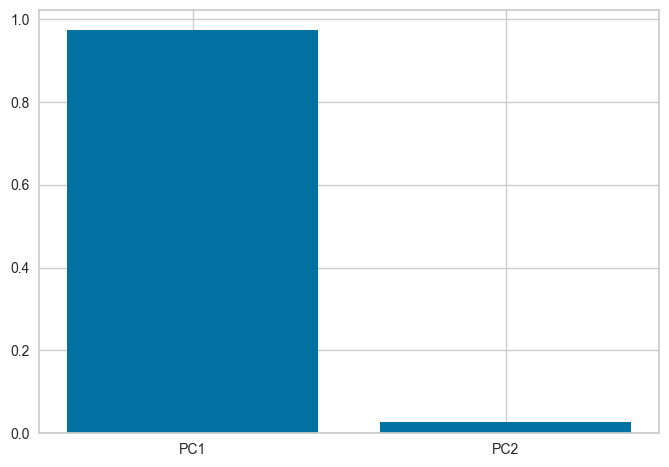

In [35]:
column_name = []
for i in range(2):
  column_name.append("PC"+str(i+1))

plt.bar(x = column_name,height=pca.explained_variance_ratio_)

In [36]:
# membuat objek dataframe dari hasil PCA
column_name = []
for i in range(2):
  column_name.append("PC"+str(i+1))

pca_transform_df = pd.DataFrame(reduced_data, columns=column_name)

# cek 5 baris pertama dari pca_transform_df
pca_transform_df.head()

,PC1,PC2
0,2.498874e+08,-6.446147e+07
1,-6.248817e+07,8.466415e+06
2,4.732874e+07,-2.376878e+07
3,3.483518e+08,-6.018400e+07
4,4.359542e+07,-2.293077e+07


### Model Training

#### Model Without Dimension Reduction

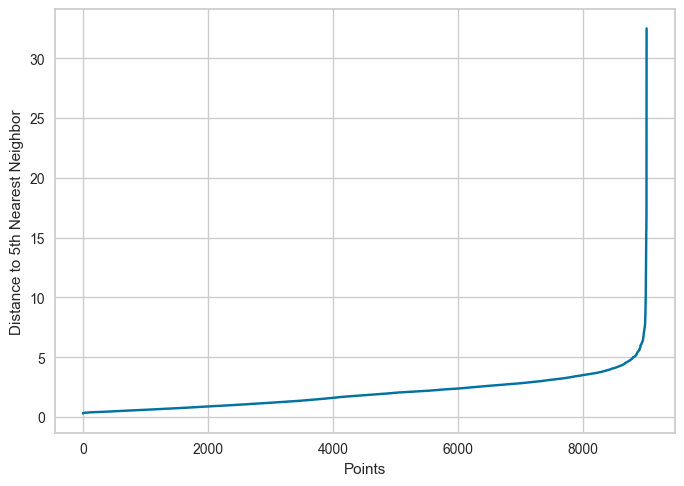

In [37]:
from sklearn.neighbors import NearestNeighbors

# Determine optimal eps
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_model_data)
distances, _ = neighbors_fit.kneighbors(scaled_model_data)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

In [38]:
#We will use DBSCAN Algorithm for this model

dbscan = DBSCAN(eps=4, min_samples=15)
dbscan.fit(scaled_model_data)

DBSCAN(eps=4, min_samples=15)

In [39]:
labels_dbscan = dbscan.labels_
np.unique(labels_dbscan,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]),
 array([ 304, 7228,  125,  186,  240,  409,  120,  301,   75,   17,   15]))

In [40]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 10
Estimated number of noise points: 304


In [41]:
# evaluasi cluster menggunakan Calinski-Harabasz
print("Calinski Harabasz Score :",calinski_harabasz_score(scaled_model_data, labels_dbscan))

# evaluasi cluster menggunakan silhouette score
print("Silhoutte Score : ",silhouette_score(scaled_model_data, labels_dbscan))

Calinski Harabasz Score : 285.3779770234938
Silhoutte Score :  0.1845461683465602


#### Model With Dimension Reduction

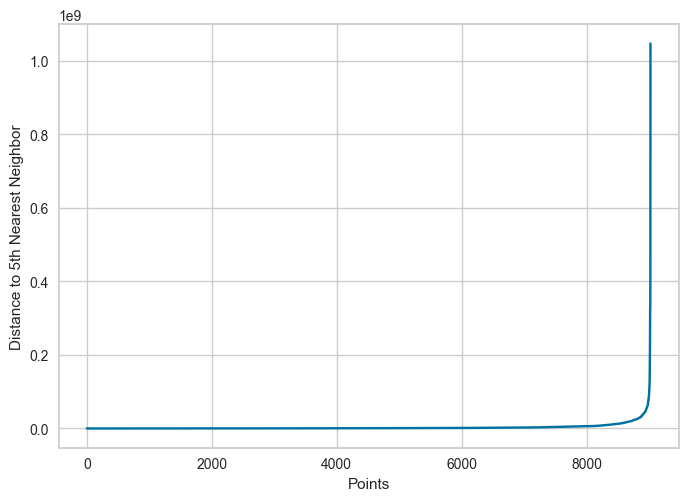

In [42]:
from sklearn.neighbors import NearestNeighbors

# Determine optimal eps
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(reduced_data)
distances, _ = neighbors_fit.kneighbors(reduced_data)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

In [43]:
dbscan_df = pca_transform_df.copy()

dbscan_df.head()

,PC1,PC2
0,2.498874e+08,-6.446147e+07
1,-6.248817e+07,8.466415e+06
2,4.732874e+07,-2.376878e+07
3,3.483518e+08,-6.018400e+07
4,4.359542e+07,-2.293077e+07


In [44]:
#We will use DBSCAN Algorithm for this model

dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan.fit(dbscan_df)

DBSCAN(min_samples=4)

In [45]:
labels_dbscan = dbscan.labels_
np.unique(labels_dbscan,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([8975,    5,    4,    6,    4,    4,   12,    4,    6]))

In [46]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 8975


In [47]:
# evaluasi cluster menggunakan Calinski-Harabasz
print("Calinski Harabasz Score :",calinski_harabasz_score(scaled_model_data, labels_dbscan))

# evaluasi cluster menggunakan silhouette score
print("Silhoutte Score : ",silhouette_score(scaled_model_data, labels_dbscan))

Calinski Harabasz Score : 2.314816630559654
Silhoutte Score :  -0.19774402579631004


#### Model With UMAP Method

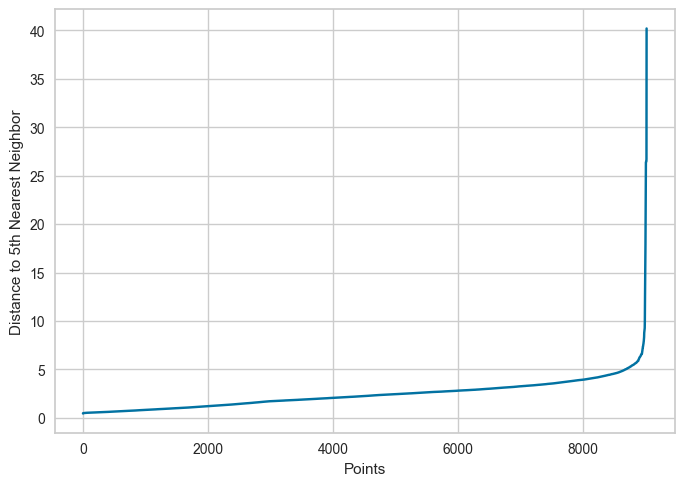

In [48]:
from sklearn.neighbors import NearestNeighbors

# Determine optimal eps
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(scaled_model_data)
distances, _ = neighbors_fit.kneighbors(scaled_model_data)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

In [49]:
#We will use DBSCAN Algorithm for this model

dbscan = DBSCAN(eps=1.5, min_samples=18)
dbscan.fit(umap_embedding)

DBSCAN(eps=1.5, min_samples=18)

In [50]:
labels_dbscan = dbscan.labels_
np.unique(labels_dbscan,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([  17, 1032,  335, 3646,  451,  568,  155,  513,  289,  101,  206,
         850,  316,  317,  224]))

In [51]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 14
Estimated number of noise points: 17


In [52]:
umap_df["dbscan_cluster"] = labels_dbscan

umap_df.head()

,UMAP_1,UMAP_2,dbscan_cluster
0,2.259758,9.820679,0
1,2.282613,9.739161,0
2,2.355848,10.229844,0
3,10.591315,-13.400667,1
4,17.486740,12.307714,2


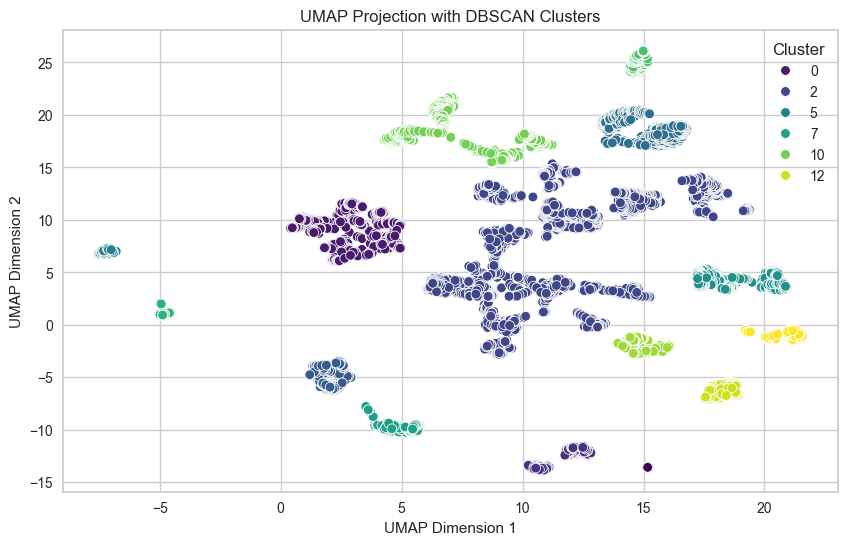

In [53]:

# Plot UMAP embeddings with DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='dbscan_cluster', data=umap_df, palette='viridis')
plt.title('UMAP Projection with DBSCAN Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster')
plt.show()

In [54]:
# evaluasi cluster menggunakan Calinski-Harabasz
print("Calinski Harabasz Score :",calinski_harabasz_score(scaled_model_data, labels_dbscan))

# evaluasi cluster menggunakan silhouette score
valid_points = umap_df['dbscan_cluster'] != -1
silhouette = silhouette_score(umap_embedding[valid_points], umap_df['dbscan_cluster'][valid_points])
print("Silhoutte Score : ",silhouette)

Calinski Harabasz Score : 353.1113899167378
Silhoutte Score :  0.4073793


In [55]:
clean_data["cluster"] = labels_dbscan

clean_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,Animation,Family,Adventure,Mystery,TV Movie,Horror,Action,History,Fantasy,cluster
0,238,The Godfather,8.707,18677,Released,1972-03-14,245066411,175,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,...,0,0,0,0,0,0,0,0,0,0
1,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,...,0,0,0,0,0,0,0,0,0,0
2,240,The Godfather Part II,8.591,11293,Released,1974-12-20,102600000,202,False,/kGzFbGhp99zva6oZODW5atUtnqi.jpg,...,0,0,0,0,0,0,0,0,0,0
3,424,Schindler's List,8.573,14594,Released,1993-12-15,321365567,195,False,/zb6fM1CX41D9rF9hdgclu0peUmy.jpg,...,0,0,0,0,0,0,0,1,0,1
4,19404,Dilwale Dulhania Le Jayenge,8.552,4256,Released,1995-10-20,100000000,190,False,/90ez6ArvpO8bvpyIngBuwXOqJm5.jpg,...,0,0,0,0,0,0,0,0,0,2


In [56]:
import rapidfuzz
from rapidfuzz import process  

def recommend_movies(data, movie_title=None, genres=None, min_runtime=None, max_runtime=None,
                    language=None, period_release=None):
    #Condition if user input movie title (use dbscan cluster)
    if movie_title:
         # Find the closest match to the input movie title
        combined_title = data["title"].tolist() + data["original_title"].tolist()
        closest_match, score, _ = process.extractOne(movie_title, combined_title)
        
        if score < 65:  # Threshold for match confidence
            return f"No close match found for '{movie_title}'. Please try again with a more specific title."
        
        #Use closest match
        movie_title = closest_match
        cluster_label = data.loc[data['title'] == movie_title, 'cluster'].values[0]
        if cluster_label == -1:
            return "This movie belongs to outlier, please try again."
        recommendations = data[data["cluster"] == cluster_label]

        # Exclude the movie with the same title as the provided movie_title
        recommendations = recommendations[recommendations['title'] != movie_title]
        
    else: #If no title provided, start with full data
        recommendations = data

    #Additional options of filters 
    if genres:
        genre_filter = recommendations[genres].sum(axis=1) > 0
        recommendations = recommendations[genre_filter]
    if min_runtime:
        recommendations = recommendations[recommendations['runtime'] >= min_runtime]
    if max_runtime:
        recommendations = recommendations[recommendations['runtime'] <= max_runtime]
    if language:
        recommendations = recommendations[recommendations['original_language'] == language]
    if period_release:
        recommendations = recommendations[recommendations['period_release'] == period_release]

    data_columns = ["title","release_date","runtime","original_language","overview",
                    "score", "genres"]

    #Use cluster when no movie title inputted
    if movie_title is None and "cluster" in data.columns:
        clusters = recommendations["cluster"].unique()
        result = []
        for cluster in clusters:
            cluster_data = recommendations[recommendations["cluster"] ==cluster]
            cluster_data = cluster_data.sort_values(['score', 'popularity'], ascending=False)
            cluster_data["cluster"] = cluster
            result.append(cluster_data)
        result_df = pd.concat(result,ignore_index=True)
        if len(result_df) < 10:
            return result_df[data_columns]
        return result_df[data_columns]
    
    #Print result with sorted volues
    recommendations = recommendations.sort_values(['score', 'popularity'], ascending=False)

    #Return top 10 recommendations
    if recommendations.empty:
        return "No movies found matching the criteria"
    elif len(recommendations) < 10:
        return recommendations[data_columns]
    #Final result
    return recommendations[data_columns]


ModuleNotFoundError: No module named 'rapidfuzz'

In [58]:
clean_data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'genres', 'keywords', 'score', 'profit',
       'period_release', 'Mystery', 'Romance', 'Documentary', 'History',
       'Action', 'Family', 'TV Movie', 'Thriller', 'Fantasy', 'Drama', 'Crime',
       'Animation', 'Adventure', 'Music', 'Science Fiction', 'Western',
       'Comedy', 'War', 'Horror', 'cluster'],
      dtype='object')

In [59]:
closest_match, score,_ = process.extractOne("inception", clean_data["original_title"])

closest_match
        

NameError: name 'process' is not defined

In [231]:
# Example usage
title_test = recommend_movies(clean_data,movie_title="Godfather")

title_test

,title,release_date,runtime,original_language,overview,score,genres
4,Dilwale Dulhania Le Jayenge,1995-10-20,190,hi,"Raj is a rich, carefree, happy-go-lucky second...",8.547381,"Comedy, Drama, Romance"
45,City Lights,1931-02-01,87,en,"In this sound-era silent film, a tramp falls i...",8.296979,"Comedy, Romance, Drama"
71,The Apartment,1960-06-21,125,en,Bud Baxter is a minor clerk in a huge New York...,8.213574,"Comedy, Drama, Romance"
156,"Love, Simon",2018-02-16,110,en,Everyone deserves a great love story. But for ...,8.038289,"Comedy, Drama, Romance"
268,Roman Holiday,1953-08-26,119,en,"Overwhelmed by her suffocating schedule, touri...",7.877176,"Romance, Comedy, Drama"
...,...,...,...,...,...,...,...
8667,The Man Who Loved Women,1983-12-18,110,en,A womanizing sculptor seeks help from a psychi...,4.947878,"Comedy, Drama, Romance"
8710,Dr. T & the Women,2000-09-13,121,en,A successful Texas gynecologist finds himself ...,4.888482,"Comedy, Drama, Romance"
8884,The Velocity of Gary,1999-07-16,100,en,When bisexual porn star Valentino meets new-in...,4.487120,"Drama, Romance, Comedy"
8978,The Room,2003-06-27,99,en,Johnny is a successful banker with great respe...,4.035841,"Comedy, Drama, Romance"


In [235]:
no_title_test = recommend_movies(clean_data,language="ja", genres=["Horror"])
no_title_test


,title,release_date,runtime,original_language,overview,score,genres
0,Godzilla vs. Destoroyah,1995-12-09,103,ja,"A burning Godzilla, on the verge of meltdown, ...",7.712088,"Action, Science Fiction, Horror"
1,Godzilla,1954-11-03,96,ja,Japan is thrown into a panic after several shi...,7.585090,"Thriller, Horror, Science Fiction"
2,Gamera: Guardian of the Universe,1995-03-11,96,ja,A ship runs aground on a mysterious atoll lead...,7.422727,"Fantasy, Science Fiction, Horror"
3,Gamera 3: Revenge of Iris,1999-03-06,108,ja,"With the Gyaos re-emerging, Gamera's ties to h...",7.309518,"Fantasy, Science Fiction, Horror"
4,Shin Godzilla,2016-07-29,120,ja,"When a massive, gilled monster emerges from th...",7.081082,"Action, Science Fiction, Horror"
5,Godzilla vs. Megaguirus,2000-11-03,105,ja,In an alternate timeline the original Godzilla...,6.574356,"Action, Science Fiction, Horror"
6,Godzilla 1985,1985-07-26,87,ja,"Originally released in Japan as ""The Return of...",6.573863,"Action, Science Fiction, Thriller, Horror"
7,Godzilla Raids Again,1955-04-24,82,ja,Two fishing scout pilots make a horrifying dis...,5.905803,"Science Fiction, Horror, Action"
8,Casshern,2004-04-24,141,ja,Fifty years of war between the Great Eastern F...,5.869740,"Drama, Horror, Science Fiction"
9,One Cut of the Dead,2017-11-04,96,ja,Things go badly for a hack director and film c...,7.620992,"Comedy, Horror"


In [236]:
cluster_label = clean_data.loc[clean_data['title'] == "Superman", 'cluster'].values[0]

cluster_label

np.int64(4)

In [60]:
clean_data.to_csv('clean_movies_data.csv',index=False, encoding='utf-8')


In [61]:
frame = pd.read_csv("clean_movies_data.csv")

In [62]:
frame.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'genres', 'keywords', 'score', 'profit',
       'period_release', 'Drama', 'War', 'Science Fiction', 'Western',
       'Romance', 'Music', 'Comedy', 'Crime', 'Documentary', 'Thriller',
       'Animation', 'Family', 'Adventure', 'Mystery', 'TV Movie', 'Horror',
       'Action', 'History', 'Fantasy', 'cluster'],
      dtype='object')

In [63]:
frame["poster_path"]

0       /3bhkrj58Vtu7enYsRolD1fZdja1.jpg
1       /lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg
2       /hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg
3       /sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg
4       /ktejodbcdCPXbMMdnpI9BUxW6O8.jpg
                      ...               
9015    /xzvzutgoXNPpTELdoH2DWx19oDz.jpg
9016    /x90nmBGWEPu28bhSngegCzbGZJC.jpg
9017    /s5QSniG6P7mtytKApSQUr3XlEbg.jpg
9018    /vezdMXYQJmA4OTczOCIagQUwsTP.jpg
9019    /to9ggXVyhNTCICHcHMCtFtANd8P.jpg
Name: poster_path, Length: 9020, dtype: object

In [138]:
    
frame["genres"] = frame["genres"].apply(lambda x:x.replace(" ","").split(","))      

# frame["genres"] = frame["genres"].str.replace("\xa0s+","",regex=False)
# frame["genres"] = frame["genres"].apply(lambda x: x.strip() if isinstance(x,str) else x)
# frame["genres"] = frame["genres"].apply(split_to_list)


In [139]:
test = frame["genres"][0]

test

['Drama', 'Crime']

In [140]:
frame["genres"]

0                                       [Drama, Crime]
1                                       [Drama, Crime]
2                                       [Drama, Crime]
3                                [Drama, History, War]
4                             [Comedy, Drama, Romance]
                             ...                      
9015                                          [Comedy]
9016                        [Action, Adventure, Crime]
9017                      [Romance, Comedy, Adventure]
9018                                  [Comedy, Family]
9019    [Adventure, Comedy, Action, Animation, Family]
Name: genres, Length: 9020, dtype: object

In [141]:
frame["genres"].explode().unique().tolist()

['Drama',
 'Crime',
 'History',
 'War',
 'Comedy',
 'Romance',
 'Animation',
 'Family',
 'Fantasy',
 'Thriller',
 'Action',
 'Adventure',
 'Western',
 'Horror',
 'ScienceFiction',
 'Music',
 'Mystery',
 'Documentary',
 'TVMovie']

In [44]:
lang_counts = frame["original_language"].value_counts() 

filtered_df = frame[frame["original_language"].isin(lang_counts[lang_counts> 30].index)]

filtered_df["original_language"].value_counts()



original_language
en    7232
hi     283
fr     278
ru     170
es     145
ja     103
it      87
ko      83
zh      79
ml      70
ta      66
de      57
te      43
cn      39
Name: count, dtype: int64

In [45]:
filtered_df["original_language"].explode().unique().tolist()

['en',
 'hi',
 'ja',
 'ko',
 'it',
 'fr',
 'ru',
 'de',
 'es',
 'cn',
 'zh',
 'te',
 'ta',
 'ml']

In [ ]:
#Let's save the trained model for Flask deployment

import joblib

# Save the trained model (assuming `model` is your trained model)
joblib.dump(dbscan, 'dbscan_model.pkl')

NameError: name 'dbscan' is not defined